In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and Overview data

In [3]:
df = pd.read_csv('C:\\Users\\Ivanna\\Documents\\supermarket_sales.csv')

In [4]:
df.shape
print(f'Dataset includes {df.shape[0]} rows and {df.shape[1]} columns')

Dataset includes 1000 rows and 17 columns


In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice id', 'branch', 'city', 'customer type', 'gender',
       'product line', 'unit price', 'quantity', 'tax 5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross margin percentage', 'gross income',
       'rating'],
      dtype='object')

## Type and size

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product line             1000 non-null   object 
 6   unit price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax 5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Convert date type

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Missing values and duplicates

In [11]:
df.isna().sum()

invoice id                 0
branch                     0
city                       0
customer type              0
gender                     0
product line               0
unit price                 0
quantity                   0
tax 5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross margin percentage    0
gross income               0
rating                     0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

## Summary statistics for all numerical columns

In [10]:
df.describe(include='number')

,unit price,quantity,tax 5%,total,cogs,gross margin percentage,gross income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# How do numerical sales metrics relate to each other?
Numerical Features Overview

In [214]:
numeric_columns = [
    'unit price',
    'quantity',
    'tax 5%',
    'total',
    'cogs',
    'gross income',
    'rating'
]

corr_matrix = df[numeric_columns].corr().round(2)
corr_matrix

,unit price,quantity,tax 5%,total,cogs,gross income,rating
unit price,1.00,0.01,0.63,0.63,0.63,0.63,-0.01
quantity,0.01,1.00,0.71,0.71,0.71,0.71,-0.02
tax 5%,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
total,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
gross income,0.63,0.71,1.00,1.00,1.00,1.00,-0.04
rating,-0.01,-0.02,-0.04,-0.04,-0.04,-0.04,1.00


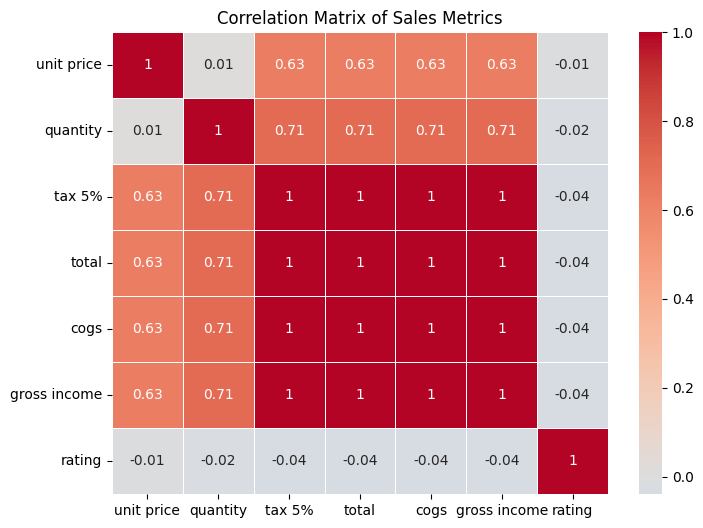

In [217]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Matrix of Sales Metrics")
plt.show();

Strong correlations between COGS, Total, Tax 5%, and Gross Income are expected, as these variables are mathematically derived from one another.

Quantity shows a stronger correlation with revenue-related metrics than Unit Price, indicating that total sales are primarily influenced by the number of items purchased rather than price variation.

Unit Price and Quantity are almost not correlated, meaning customers do not buy more or less mainly because of price differences.

Customer Rating shows no meaningful relationship with sales metrics, so higher ratings do not directly lead to higher spending in this dataset.

Overall, the correlations reflect the structure of the data rather than strong customer behavior patterns.

# What categorical variables are present in the dataset, and how are their values distributed overall?
Categorical Features Overview

In [16]:
categorical_columns = [
    'branch', 
    'city', 
    'customer type', 
    'gender', 
    'product line', 
    'payment'
]

for col in categorical_columns:
    print(col, ":", df[col].unique())

branch : ['A' 'C' 'B']
city : ['Yangon' 'Naypyitaw' 'Mandalay']
customer type : ['Member' 'Normal']
gender : ['Female' 'Male']
product line : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
payment : ['Ewallet' 'Cash' 'Credit card']


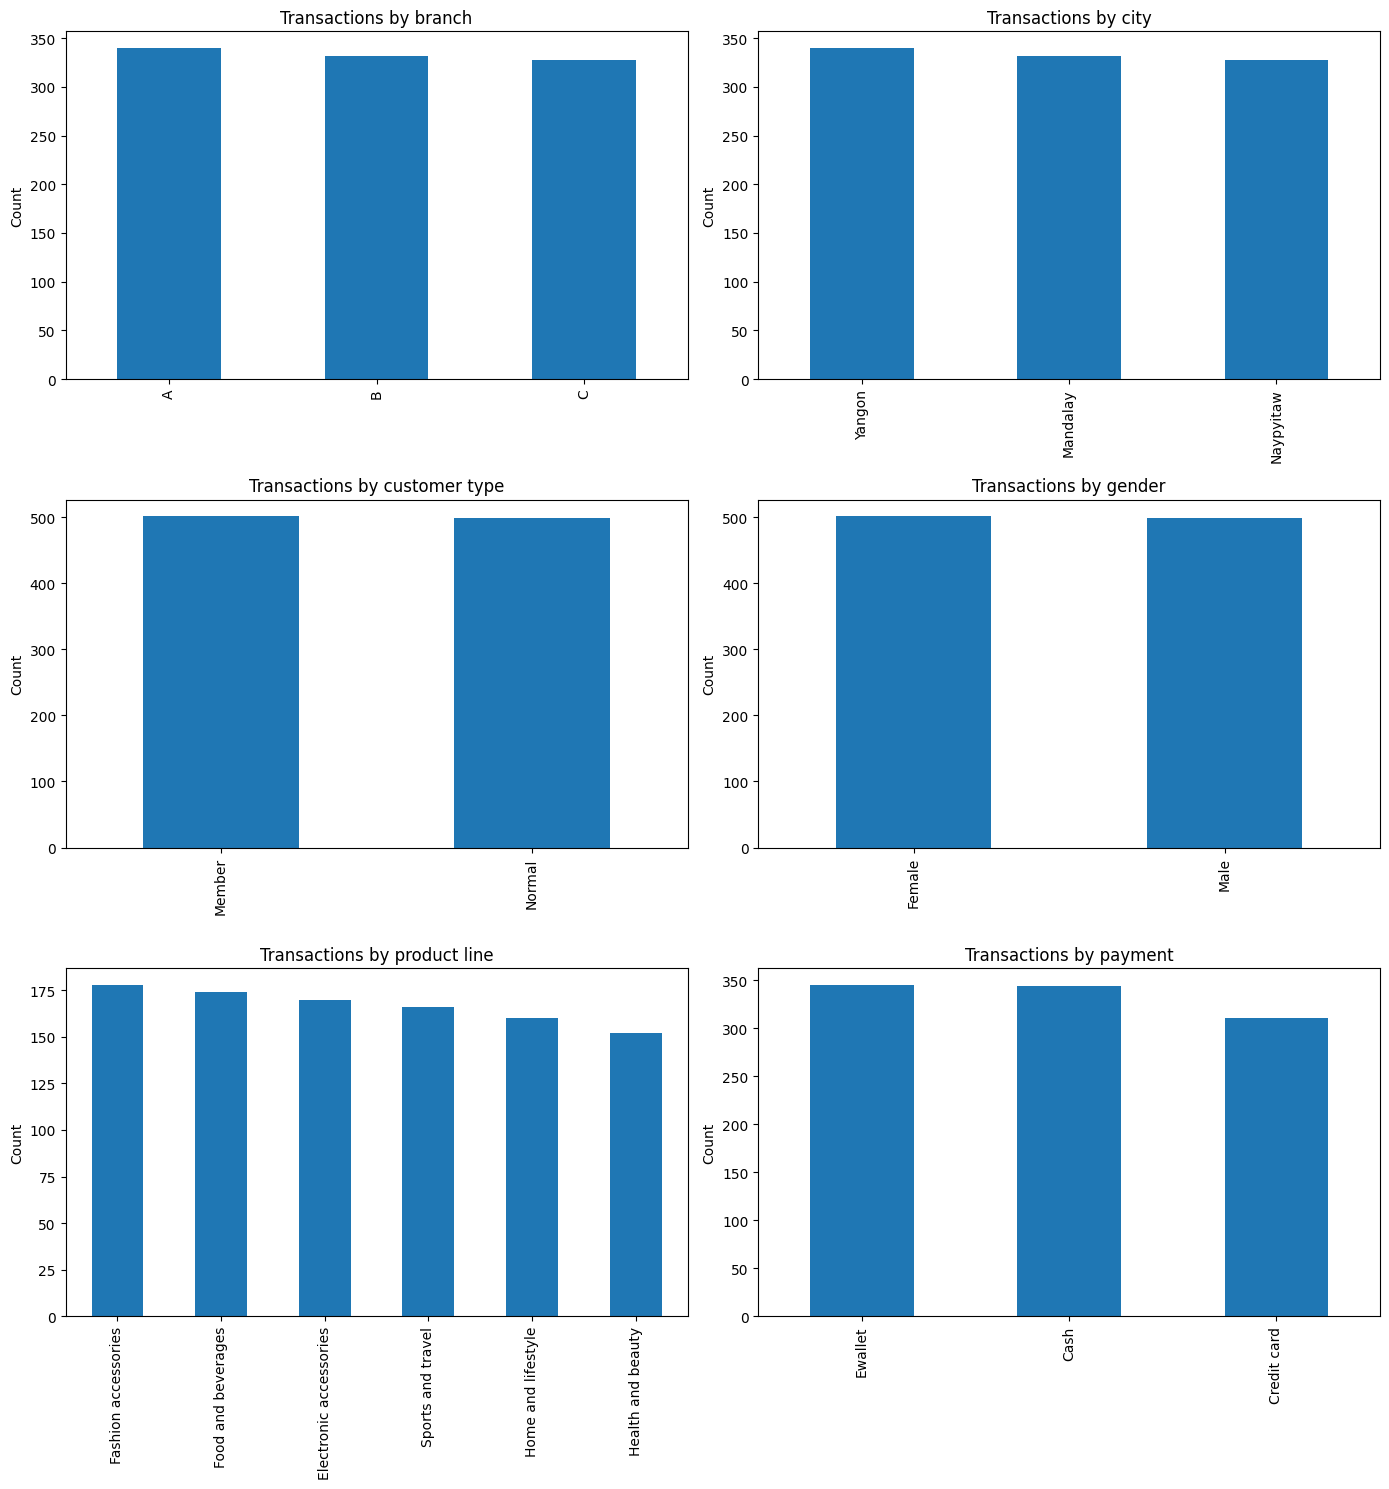

In [218]:
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Transactions by {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show();

Categorical variables are generally balanced across all categories. 
No strong dominance or extreme imbalance is observed for branches, cities, customer types, genders, product lines, or payment methods. 
This suggests that the dataset provides a stable basis for further segment-level analysis.

# How many visits were made by customers with different customer types?

In [22]:
df['customer type'].value_counts()

customer type
Member    501
Normal    499
Name: count, dtype: int64

# Does customer type differ by gender (in %)?

In [90]:
pd.crosstab(
    df['gender'],
    df['customer type'],
    normalize='index'
).round(2) * 100

customer type,Member,Normal
gender,,
Female,52.0,48.0
Male,48.0,52.0


Both male and female customers are almost evenly split between members and non-members.

# Does customer type differ by city (in %)?

In [175]:
pd.crosstab(
    df['city'], 
    df['customer type'],
    normalize='index'
).round(2) * 100

customer type,Member,Normal
city,,
Mandalay,50.0,50.0
Naypyitaw,52.0,48.0
Yangon,49.0,51.0


No significant differences in customer type distribution were observed across cities. 
The balanced proportions of members and non-members suggest a uniform customer base and a consistent membership strategy across all locations.

# How does purchasing behavior differ between Member and Normal customers?

In [116]:
type_summary = df.groupby('customer type').agg(
    total_revenue = ('total', 'sum'),
    total_quantity = ('quantity', 'sum'),
    avg_transaction_value = ('total', 'mean'),
    avg_rating = ('rating', 'mean')
).round(2)

type_summary

,total_revenue,total_quantity,avg_transaction_value,avg_rating
customer type,,,,
Member,164223.44,2785,327.79,6.94
Normal,158743.30,2725,318.12,7.01


# Are there differences in purchasing behavior by gender?

In [115]:
gender_summary = df.groupby('gender').agg(
    total_revenue = ('total', 'sum'),
    total_quantity = ('quantity', 'sum'),
    avg_transaction_value = ('total', 'mean'),
    avg_rating = ('rating', 'mean')
).round(2)

gender_summary

,total_revenue,total_quantity,avg_transaction_value,avg_rating
gender,,,,
Female,167882.92,2869,335.10,6.96
Male,155083.82,2641,310.79,6.98


Members and female customers generate slightly higher revenue and purchase volumes.

Average transaction values and ratings are very similar across customer types and genders.

Overall, purchasing behavior is largely consistent, with no strong demographic-driven differences.

# What product lines are present in the dataset?

In [87]:
df['product line'].value_counts()

product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

# How do product lines differ in revenue, sales volume, pricing, and customer satisfaction?

In [123]:
product_line_summary = df.groupby('product line').agg(
    total_revenue = ('total', 'sum'),
    total_quantity = ('quantity', 'sum'),
    avg_price = ('unit price', 'mean'),
    avg_rating = ('rating', 'mean')
).round(2)

product_line_summary.sort_values(by='total_revenue', ascending=False)

,total_revenue,total_quantity,avg_price,avg_rating
product line,,,,
Food and beverages,56144.84,952,56.01,7.11
Sports and travel,55122.83,920,56.99,6.92
Electronic accessories,54337.53,971,53.55,6.92
Fashion accessories,54305.90,902,57.15,7.03
Home and lifestyle,53861.91,911,55.32,6.84
Health and beauty,49193.74,854,54.85,7.00


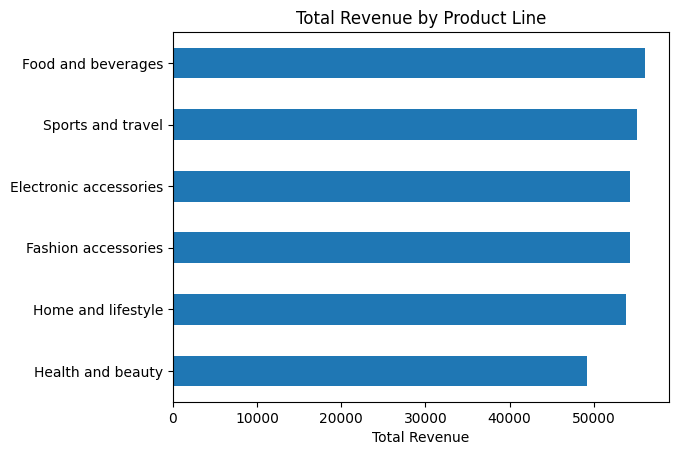

In [98]:
df.groupby('product line')['total'].sum().sort_values().plot(kind='barh')
plt.xlabel('Total Revenue')
plt.ylabel('')
plt.title('Total Revenue by Product Line')
plt.show();

The dataset is well-balanced across all product lines.

Food and beverages leads in total revenue and has the highest customer rating.

Electronic accessories sell the largest quantity, driven by lower average prices.

Health and beauty shows the lowest revenue, despite solid customer ratings.

# Which branch is the most profitable?

In [224]:
profitable_branch = df.groupby('branch')['gross income'].sum().round(2).idxmax()
profitable_branch

'C'

# Time-Based Sales Analysis

In [151]:
df[['date']].agg(
    min_date=('date', 'min'),
    max_date=('date', 'max')
)

,date
min_date,2019-01-01
max_date,2019-03-30


In [195]:
# Create new columns
df['day of week'] = df['date'].dt.day_name()
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

In [196]:
df.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating,hour,day of week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday


## How does the number of visits vary by hour of the day?

In [168]:
df.groupby('hour').size()

hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
dtype: int64

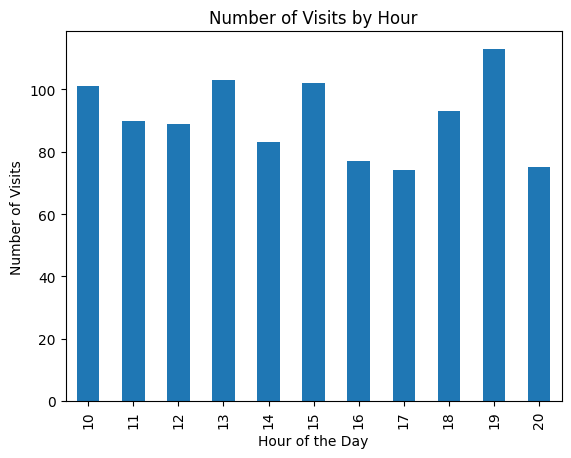

In [169]:
df.groupby('hour').size().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.title('Number of Visits by Hour')
plt.show();

Customer visits vary throughout the day, with a clear peak at 19, suggesting increased shopping activity in the evening.

Secondary peaks around midday may be linked to lunch breaks or flexible daytime schedules.

## Which hours are not only busy, but also profitable?

In [190]:
hourly_summary = df.groupby('hour').agg(
    visits=('invoice id', 'count'),
    total_revenue=('total', 'sum')
).round(2)

hourly_summary

,visits,total_revenue
hour,,
10,101,31421.48
11,90,30377.33
12,89,26065.88
13,103,34723.23
14,83,30828.40
15,102,31179.51
16,77,25226.32
17,74,24445.22
18,93,26030.34


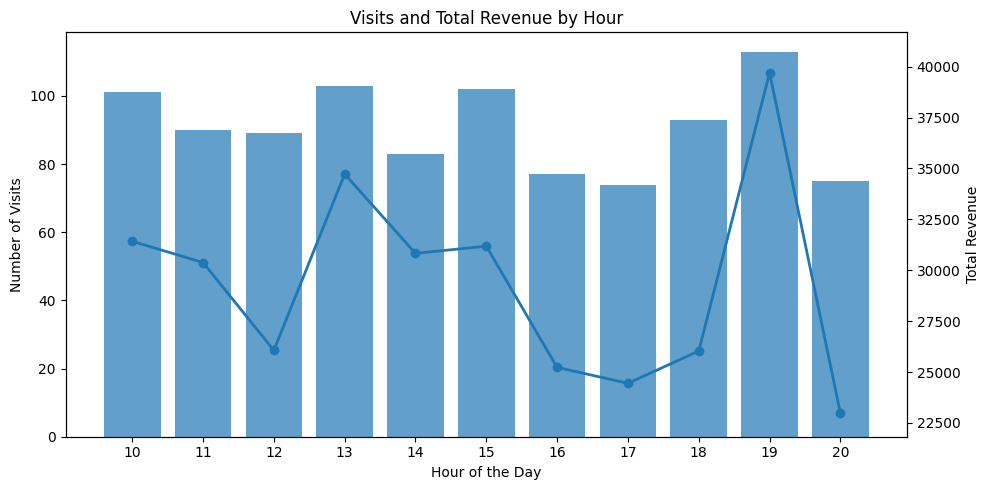

In [191]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bars — visits
ax1.bar(
    hourly_summary.index,
    hourly_summary['visits'],
    alpha=0.7
)
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Visits')
ax1.set_xticks(hourly_summary.index)

# Line — revenue
ax2 = ax1.twinx()
ax2.plot(
    hourly_summary.index,
    hourly_summary['total_revenue'],
    marker='o',
    linewidth=2
)
ax2.set_ylabel('Total Revenue')

# Improve revenue axis readability
ax2.set_ylim(
    hourly_summary['total_revenue'].min() * 0.95,
    hourly_summary['total_revenue'].max() * 1.05
)

plt.title('Visits and Total Revenue by Hour')
plt.tight_layout()
plt.show();

19 is the peak hour, showing the highest number of visits and the highest total revenue.

Sales performance declines sharply after 19, with 20 recording the lowest revenue and one of the lowest visit counts.

Midday hours (13–15) show consistently high traffic and revenue, indicating stable sales performance during this period.

## How do sales and customer visits change during the week?

In [200]:
day_summary = df.groupby('day of week').agg(
    visits = ('invoice id', 'count'),
    total_revenue = ('total', 'sum'),
    avg_transaction=('total', 'mean')
).round(2)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_summary = day_summary.loc[order]

day_summary

,visits,total_revenue,avg_transaction
day of week,,,
Monday,125,37899.08,303.19
Tuesday,158,51482.25,325.84
Wednesday,143,43731.14,305.81
Thursday,138,45349.25,328.62
Friday,139,43926.34,316.02
Saturday,164,56120.81,342.20
Sunday,133,44457.89,334.27


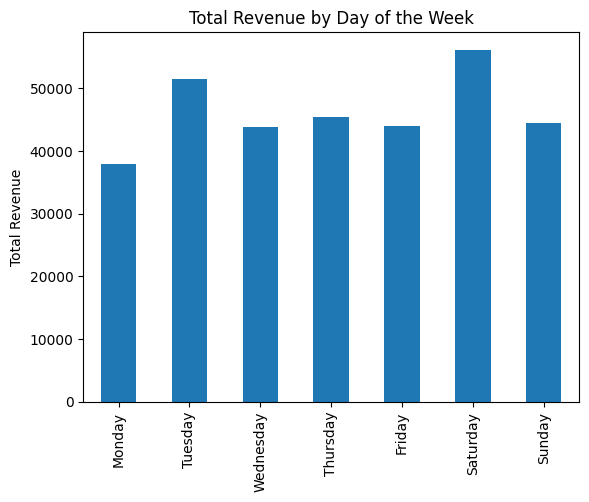

In [202]:
day_summary['total_revenue'].plot(kind='bar')
plt.xlabel('')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of the Week')
plt.show();

Saturday is the strongest day, driven by both high customer traffic and the highest average transaction value.

Monday shows the weakest performance, with lower revenue partly explained by smaller average transaction sizes.